<a href="https://colab.research.google.com/github/jiiiisoo/machinelearning/blob/main/2.%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98_1D%20%EC%9E%85%EB%A0%A5%202class%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **확률로 나타내는 클래스 분류**



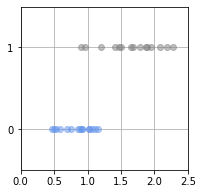

In [2]:
##데이터 생성
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=0) #난수 고정
X_min=0
X_max=2.5
X_n=30
X_col=['cornflowerblue', 'gray']
X=np.zeros(X_n)
T=np.zeros(X_n, dtype=np.uint8) #??
Dist_s=[0.4,0.8] #몸무게 시작 지점
Dist_w=[0.8,1.6] #몸무게 폭
Pi=0.5 #클래스 0의 비율
for i in range (X_n):
  wk=np.random.rand()
  T[i]=0*(wk<Pi)+1*(wk>=Pi) #True=1, False=0 / T:성별
  X[i]=np.random.rand()*Dist_w[T[i]]+Dist_s[T[i]] #나이

def show_data(x,t):
  K=np.max(t)+1
  for k in range(K):
    plt.plot(x[t==k],t[t==k],X_col[k], alpha=0.5, linestyle='none', marker='o')
    plt.grid(True)
    plt.ylim(-.5,1.5)
    plt.xlim(X_min,X_max)
    plt.yticks([0,1])

##main
fig=plt.figure(figsize=(3,3))
show_data(X,T)
plt.show()

위의 데이터 그래프를 보면 알 수 있듯, x<0.8이면 확실히 암컷, x>1.2이면 확실히 수컷임을 알 수 있다. 따라서 0.8<=x<=1.2 에서 예측할 수 있으면 된다. 이는 x가 0.8~1.2 사이일 때 수컷일 확률을 구하여 나타낼 수 있다.

이 같이 x에 대해 t=1 (수컷)일 확률은 조건부 확률로 P(t=1|x) 로 나타낼 수 있다.

**최대가능도법**

예를 들어 x가 0.8<=x<=1.2 로 P(t=1|x)를 추정해보면 P(t=1|x)=w 로 단순한 모델을 고려할 수 있다. (0<=w<=1)

이 모델이 T=0,0,0,1 이라는 데이터를 생성했다고 가정하여 가장 타당한 w를 추정하는 문제를 고려해보자.

단순히 생각하면 w=1/4이지만 다른 모델 경우에도 대응할 수 있도록 일반적인 최대가능도법으로 구한다. 먼저 모델에서 T=0,0,0,1이 생성될 확률을 생각하고 이 확률을 가능도라고 한다. 예를 들어 w=0.1일 때의 가능도는 P(t=1|x)=0.1이므로 T=0,0,0,1이 될 가능도는 (0.9)^3*(0.1)=0.0729, w=0.2일 때의 가능도는 같은 방법으로 0.1024이다. 따라서 만약 T=0,0,0,1이라는 데이터를 생성한 모델의 매개변수 w가 0.1, 0.2 중 하나라면 w=0.2 인 경우가 가능도가 더 높으므로 적절하다.

위와 같은 방법으로 w를 해석적으로 찾아보면 가능도는 P(T=0,0,0,1|x)=(1-w)^3*(w) 로 나타낼 수 있다.

즉, 최대가능도법이란 주어진 입력 데이터 x에 대해 라벨 데이터 t가 생성될 확률(가능도) 이 가장 커지는 w를 추정치로 하는 것이다.

위 식을 이용하여 w의 최댓값을 구하면, 로그를 취했을 때 계산이 더 편해지므로 양변에 로그를 취하고 이 가능도를 로그가능도라고 하며 평균 제곱 오차 함수 대신 사용되는 확률 세계의 목적함수이다.

dlog(P)/dw=d{3log(1-w)+log(w)}/dw=0 , w=1/4

하지만 이는 x가 0.8,1.2 사이에서 확률이 일정하다고 가정하고 구한 것인데, 항상 확률이 일정하지 않을 수도 있으므로 이를 적용하여 모델을 구해보자.

**로지스틱 회귀 모델**

데이터가 가우스 분포를 따른다고 가정하면 조건부 확률 P(t=1|x)는 로지스틱 회귀 모델로 나타내는데 이 모델은 y=w0*x+w1 직선 함수를 시그모이드 함수인 𝜎(x)=1/{1+exp(-x)} 안에 넣은 것이다.

y=𝜎(w0x+w1)=1/{1+exp(-(w0x+w1))}

이렇게 하면 x가 커지면 1에 수렴하고, x가 작아지면 0에 수렴하여 시그모이드를 통과한 직선의 함수는 0과 1사이에 들어가고 직선이 0의 값을 가지면 확률은 0.5의 값을 가진다.

1.25

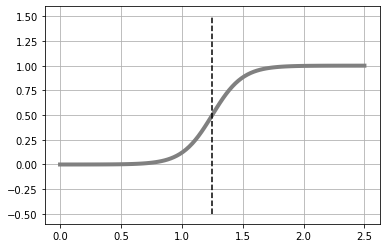

In [3]:
##로지스틱 함수
def logistic(x,w):
  y=1/(1+np.exp(-(w[0]*x+w[1])))
  return y

##main
def show_logistic(w):
  xb=np.linspace(X_min,X_max,100)
  y=logistic(xb,w)
  plt.plot(xb,y,color='gray', linewidth=4)
  #결정경계
  i=np.min(np.where(y>0.5)) #y>0.5 인 xb들 중 최소
  B=(xb[i-1]+xb[i])/2 #y==0.5 인 xb의 근사값
  plt.plot([B,B],[-.5,1.5], color='k', linestyle='--')
  plt.grid(True)
  return B

##test
W=[8,-10]
show_logistic(W)

**교차 엔트로피 오차**

로지스틱 회귀 모델에서는 t=1이 될 확률을 y=𝜎(w0x+w1)=1/{1+exp(-(w0x+w1))} 으로 나타냈다.

데이터가 하나뿐이라고 가정하고 무게 x에 대해 t=1이라면 t=1이 될 확률은 위의 y값 자체이다. 이러한 클래스의 생성 확률을 나타내면 P(t|x)=y^t*(1-y)^(1-t)이다.

이때, 데이터가 N개라면 주어진 X=x_0,x_1,...,x_N-1 에 대한 클래스 T=t_0,t_1,...,t_N-1의 생성확률은 하나하의 데이터 생성확률을 모든 데이터에 곱하면 된다. 

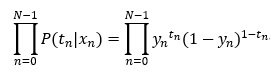

위 식 양변에 로그를 취하여 로그가능도를 얻고 w_0,w_1은 로그가능도가 최대가 되도록 구한다. 하지만 지금까지는 평균 제곱 오차의 최소를 구했으므로 맞춰주기위해 -1을 곱하면 이를 교차 엔트로피 오차, cross-entropy error fuction이라고 한다. 그리고 교차 엔트로피 오차에 N을 나눈 평균 교차 엔트로피 오차를 E(w)로 정의한다. 그 이유는 데이터 개수에 오차 값이 영향 받지 않도록 하고, 수치 확인에 편하기 때문이다.

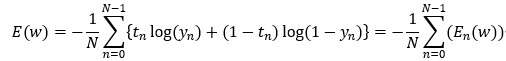

In [4]:
##평균 교차 엔트로피 오차
def cee_logistic(w,x,t):
  y=logistic(x,w)
  cee=0
  for i in range(len(y)): #y의 수만큼 더함
    cee-=t[i]*np.log(y[i])+(1-t[i])*np.log(1-y[i])
  cee/=X_n
  return cee

**학습 규칙 도출**

교차 엔트로피 오차를 최소화하는 매개 변수는 경사 하강법을 이용하여 수치적으로 구한다. 

E_n(w)를 E(w)의 시그마 안에 들어가는 함수라고 하면, E_n(w)를 w_0에 대해 편미분하면, -x_n(y_n-t_n)이 되고 w_1에 대해 편미분하면, -(y_n-t_n)이 된다.

In [7]:
##E(w)의 미분
def dcee_logistic(w,x,t):
  y=logistic(x,w)
  dcee=np.zeros(2)
  for i in range(len(y)): #len(y)==X_n (X 데이터 개수)
    dcee[0]+=x[i]*(y[i]-t[i])
    dcee[1]+=y[i]-t[i]
  dcee/=X_n
  return dcee

**경사하강법 의한 해**

경사 하강법으로 로지스틱 회귀 모델의 w값을 찾아보자.

w0=8.18, w1=-9.38
CEE=0.25
Boundary=1.15 g


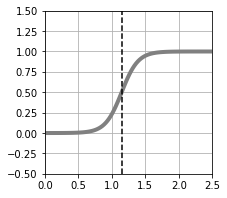

In [8]:
from scipy.optimize import minimize

##경사하강법
def fit_logistic(w_init,x,t):
  res1=minimize(cee_logistic,w_init, args=(x,t), jac=dcee_logistic, method='CG') #jac: 미분할 함수 지정 / CG(Conjugate Gradient Method): 경사하강법의 일종 ???
  return res1.x

##main
plt.figure(figsize=(3,3))
W_init=[1,-1]
W=fit_logistic(W_init,X,T)
print('w0={0:.2f}, w1={1:.2f}'.format(W[0],W[1]))
B=show_logistic(W)
plt.ylim(-.5,1.5)
plt.xlim(X_min,X_max)
cee=cee_logistic(W,X,T)
print('CEE={0:.2f}'.format(cee))
print('Boundary={:.2f} g'.format(B))
plt.show()

출처: 파이썬으로 배우는 머신러닝의 교과서-이시카와아키히코